<a href="https://colab.research.google.com/github/Namish1805/Book-Genre-Classification/blob/main/ManishKumar_2428cseai1289.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Report:
               precision    recall  f1-score   support

     fantasy       0.29      0.50      0.36         4
     fiction       1.00      1.00      1.00         1
     mystery       0.67      0.60      0.63        10
 non-fiction       0.67      0.40      0.50         5

    accuracy                           0.55        20
   macro avg       0.65      0.62      0.62        20
weighted avg       0.61      0.55      0.56        20

Confusion Matrix:
 [[2 0 2 0]
 [0 1 0 0]
 [3 0 6 1]
 [2 0 1 2]]


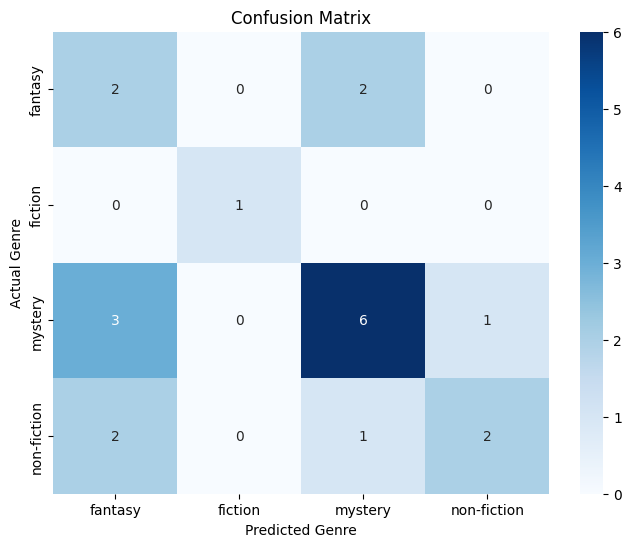

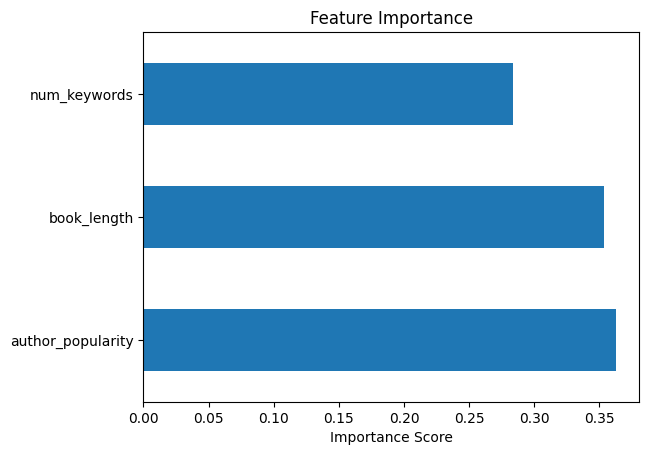

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv("/content/book_genres.csv")

# Step 2: Separate features (inputs) and the target (output/genre)
X = df[['author_popularity', 'book_length', 'num_keywords']]  # Input features
y = df['genre']  # Target variable (genre of the book)

# Step 3: Split the data into training and testing sets
# 80% data for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize (normalize) the input features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit to training data
X_test_scaled = scaler.transform(X_test)        # Use same scaling for test data

# Step 5: Create and train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Step 6: Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Step 7: Print evaluation results
# This shows how well the model performed
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 8: Show the confusion matrix as a heatmap (for better visualization)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_,
            yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Genre')
plt.ylabel('Actual Genre')
plt.show()

# Step 9: Show which features are most important for prediction
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance.plot(kind='barh', title='Feature Importance')
plt.xlabel('Importance Score')
plt.show()
